In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

In [ ]:

files = {
    "deliveries":"/content/deliveries.csv" ,
    "ipl_data": "/content/IPL_Data.csv",
    "matches": "/content/matches.csv"
}
deleveries_df="/content/deliveries.csv"
matches_df="/content/matches.csv"



In [ ]:

datasets = {name: pd.read_csv(path) for name, path in files.items()}

eda_results ={}
for name, df in datasets.items():
  eda_results[name] = {
        "shape": df.shape}


eda_results


{'deliveries': {'shape': (260920, 17)},
 'ipl_data': {'shape': (237, 39)},
 'matches': {'shape': (1095, 20)}}

In [ ]:
for name, df in datasets.items():
    eda_results[name] = {
        "info": df.dtypes.to_dict()
    }

eda_results

{'deliveries': {'info': {'match_id': dtype('int64'),
   'inning': dtype('int64'),
   'batting_team': dtype('O'),
   'bowling_team': dtype('O'),
   'over': dtype('int64'),
   'ball': dtype('int64'),
   'batter': dtype('O'),
   'bowler': dtype('O'),
   'non_striker': dtype('O'),
   'batsman_runs': dtype('int64'),
   'extra_runs': dtype('int64'),
   'total_runs': dtype('int64'),
   'extras_type': dtype('O'),
   'is_wicket': dtype('int64'),
   'player_dismissed': dtype('O'),
   'dismissal_kind': dtype('O'),
   'fielder': dtype('O')}},
 'ipl_data': {'info': {'Name': dtype('O'),
   'Team': dtype('O'),
   'Url': dtype('O'),
   'Type': dtype('O'),
   'ValueinCR': dtype('float64'),
   'Full Name': dtype('O'),
   'Born': dtype('O'),
   'Age': dtype('O'),
   'National Side': dtype('O'),
   'Batting Style': dtype('O'),
   'Bowling': dtype('O'),
   'Sport': dtype('O'),
   'MatchPlayed': dtype('float64'),
   'InningsBatted': dtype('float64'),
   'NotOuts': dtype('float64'),
   'RunsScored': dtype('f

In [ ]:
for name, df in datasets.items():
    eda_results[name] = {
        "missing_values": df.isnull().sum().to_dict()
    }

eda_results

{'deliveries': {'missing_values': {'match_id': 0,
   'inning': 0,
   'batting_team': 0,
   'bowling_team': 0,
   'over': 0,
   'ball': 0,
   'batter': 0,
   'bowler': 0,
   'non_striker': 0,
   'batsman_runs': 0,
   'extra_runs': 0,
   'total_runs': 0,
   'extras_type': 246795,
   'is_wicket': 0,
   'player_dismissed': 247970,
   'dismissal_kind': 247970,
   'fielder': 251566}},
 'ipl_data': {'missing_values': {'Name': 0,
   'Team': 0,
   'Url': 0,
   'Type': 0,
   'ValueinCR': 0,
   'Full Name': 6,
   'Born': 6,
   'Age': 6,
   'National Side': 6,
   'Batting Style': 10,
   'Bowling': 31,
   'Sport': 111,
   'MatchPlayed': 75,
   'InningsBatted': 75,
   'NotOuts': 75,
   'RunsScored': 84,
   'HighestInnScore': 84,
   '100s': 75,
   '50s': 75,
   '4s': 75,
   '6s': 75,
   'BattingAVG': 92,
   'BattingS/R': 75,
   'CatchesTaken': 92,
   'StumpingsMade': 92,
   'Ducks': 76,
   'R/O': 76,
   'InningsBowled': 115,
   'Overs': 115,
   'Maidens': 115,
   'RunsConceded': 115,
   'Wickets': 11

In [ ]:
for name, df in datasets.items():
    eda_results[name] = {
        "summary_statistics": df.describe().to_dict()
    }

eda_results

{'deliveries': {'summary_statistics': {'match_id': {'count': 260920.0,
    'mean': 907066.5060861567,
    'std': 367991.2782546434,
    'min': 335982.0,
    '25%': 548334.0,
    '50%': 980967.0,
    '75%': 1254066.0,
    'max': 1426312.0},
   'inning': {'count': 260920.0,
    'mean': 1.4835313506055496,
    'std': 0.5026432007647097,
    'min': 1.0,
    '25%': 1.0,
    '50%': 1.0,
    '75%': 2.0,
    'max': 6.0},
   'over': {'count': 260920.0,
    'mean': 9.197677449026521,
    'std': 5.683483718470767,
    'min': 0.0,
    '25%': 4.0,
    '50%': 9.0,
    '75%': 14.0,
    'max': 19.0},
   'ball': {'count': 260920.0,
    'mean': 3.6244864326230264,
    'std': 1.8149204567816482,
    'min': 1.0,
    '25%': 2.0,
    '50%': 4.0,
    '75%': 5.0,
    'max': 11.0},
   'batsman_runs': {'count': 260920.0,
    'mean': 1.265000766518473,
    'std': 1.6392976465835523,
    'min': 0.0,
    '25%': 0.0,
    '50%': 1.0,
    '75%': 1.0,
    'max': 6.0},
   'extra_runs': {'count': 260920.0,
    'mean': 0

In [ ]:
for name, df in datasets.items():
    eda_results[name] = {
        "duplicates": df.duplicated().sum()
    }

eda_results

{'deliveries': {'duplicates': 0},
 'ipl_data': {'duplicates': 0},
 'matches': {'duplicates': 0}}

In [ ]:
deliveries=pd.read_csv(deleveries_df)
matches=pd.read_csv(matches_df)

In [ ]:
sns.set(style="whitegrid")

##1.Total Runs Scored Per Over

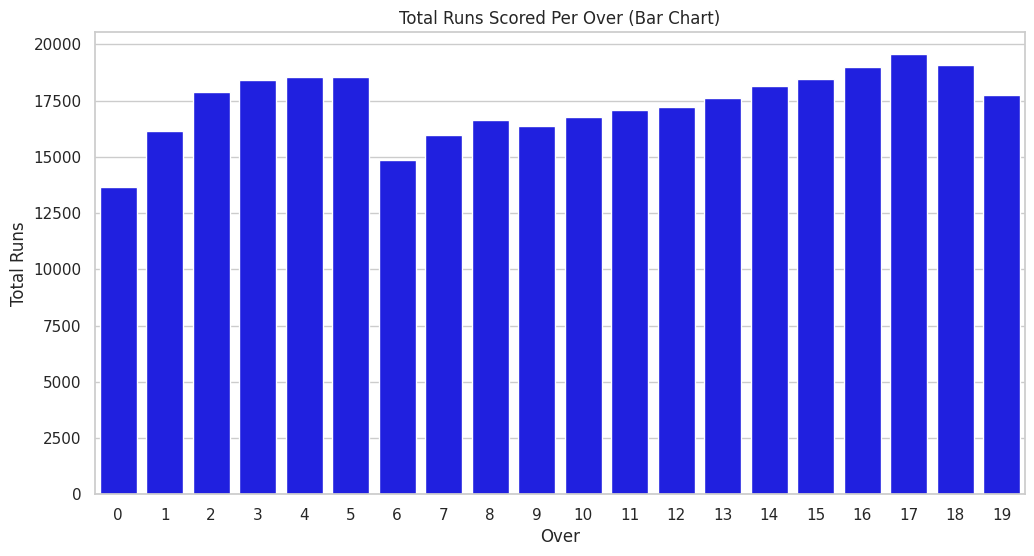

In [ ]:
plt.figure(figsize=(12, 6))
runs_per_over = deliveries.groupby("over")["total_runs"].sum()
sns.barplot(x=runs_per_over.index, y=runs_per_over.values, color="blue")
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.title("Total Runs Scored Per Over (Bar Chart)")
plt.show()

##2.Dismissal Types Distribution


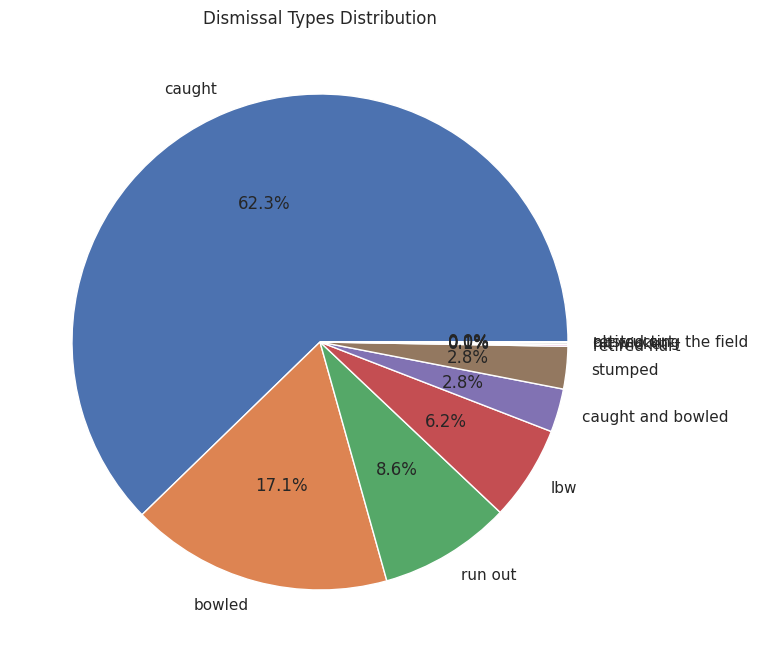

In [ ]:
plt.figure(figsize=(8,10))
dismiss=deliveries["dismissal_kind"].value_counts()
plt.pie(dismiss,labels=dismiss.index,autopct='%1.1f%%')
plt.title("Dismissal Types Distribution")
plt.show()


##3.Total Extra Runs Conceded By Team

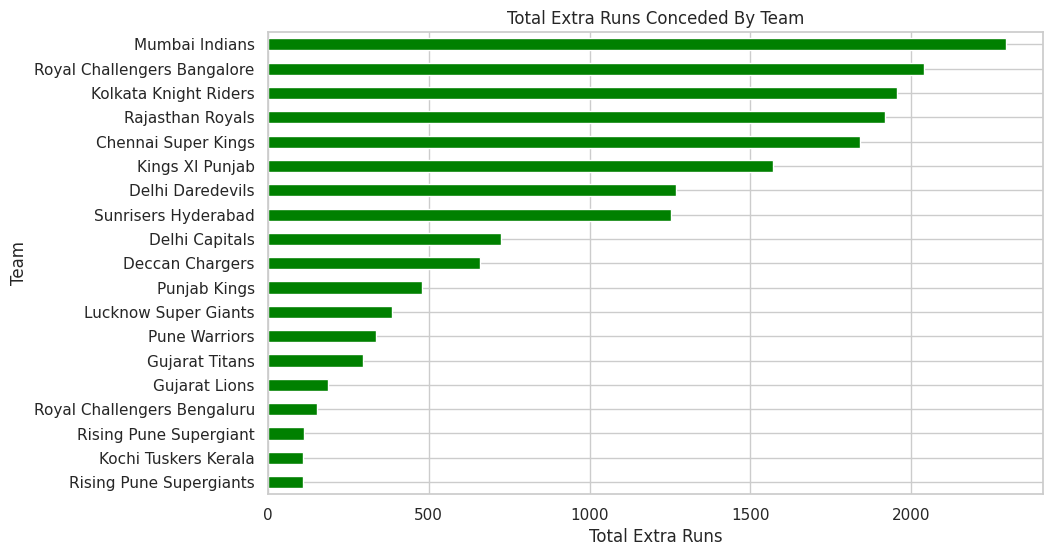

In [ ]:
plt.figure(figsize=(10, 6))
extra=deliveries.groupby("bowling_team")["extra_runs"].sum().sort_values()
extra.plot(kind="barh",color="green")
plt.xlabel("Total Extra Runs")
plt.ylabel("Team")
plt.title("Total Extra Runs Conceded By Team")
plt.show()

##4.Average Runs Per over-Line chart

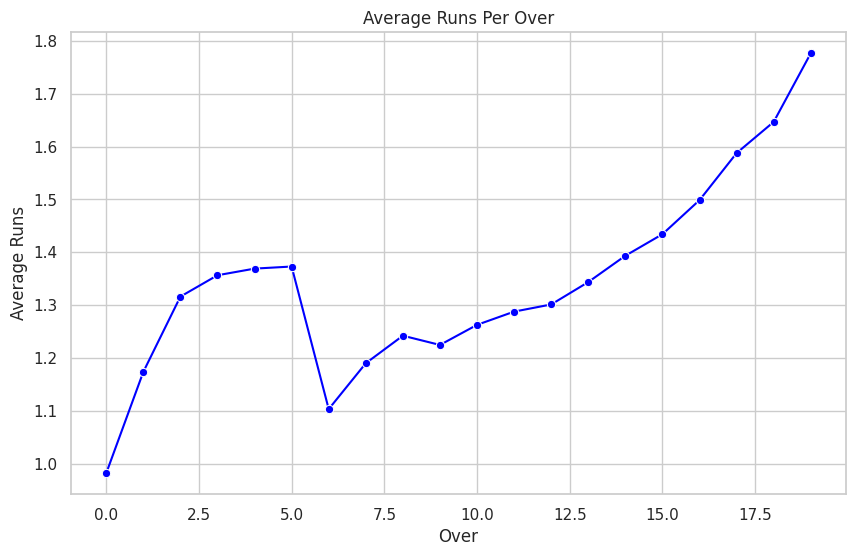

In [ ]:
plt.figure(figsize=(10, 6))
avg_runs=deliveries.groupby("over")["total_runs"].mean()
sns.lineplot(x=avg_runs.index,y=avg_runs.values,marker="o",color="blue")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.title("Average Runs Per Over")
plt.show()

##5.Distribution of Runs Per Ball

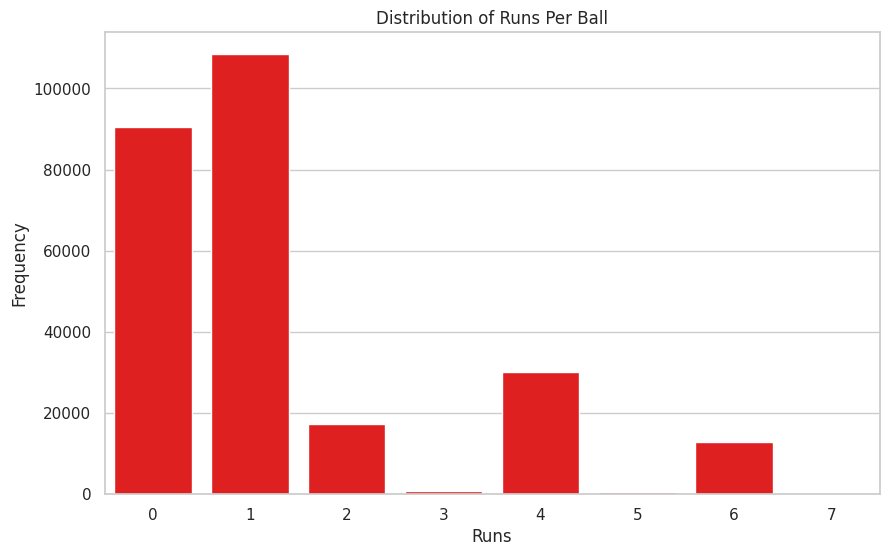

In [ ]:
plt.figure(figsize=(10, 6))
runs_per_ball=deliveries["total_runs"].value_counts().sort_index()
sns.barplot(x=runs_per_ball.index,y=runs_per_ball.values,color="red")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.title("Distribution of Runs Per Ball")
plt.show()

##6.Top 10 Batsmen by Strike Rate

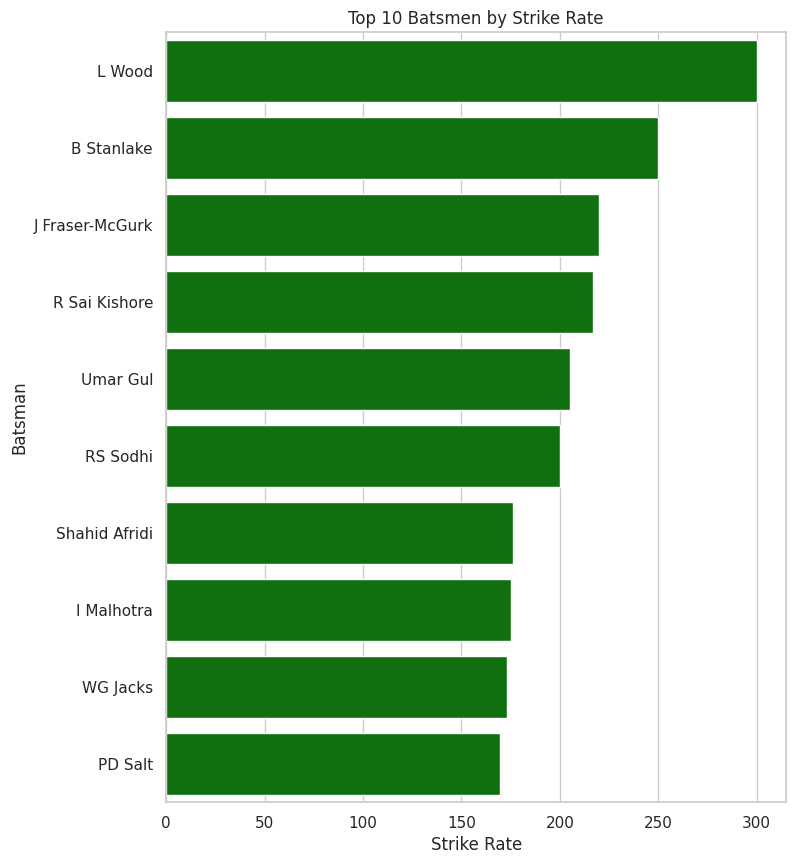

In [ ]:
plt.figure(figsize=(8,10))
total_runs=deliveries.groupby("batter")["batsman_runs"].sum()
total_balls=deliveries.groupby("batter")["ball"].count()
strike_rate=total_runs/total_balls*100
sns.barplot(x=strike_rate.nlargest(10),y=strike_rate.nlargest(10).index,color="green")
plt.xlabel("Strike Rate")
plt.ylabel("Batsman")
plt.title("Top 10 Batsmen by Strike Rate")
plt.show()

##7.Most Sixes Hit by Players

<ipython-input-21-8b26fbfc6f3b>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors=cm.get_cmap('viridis',10)


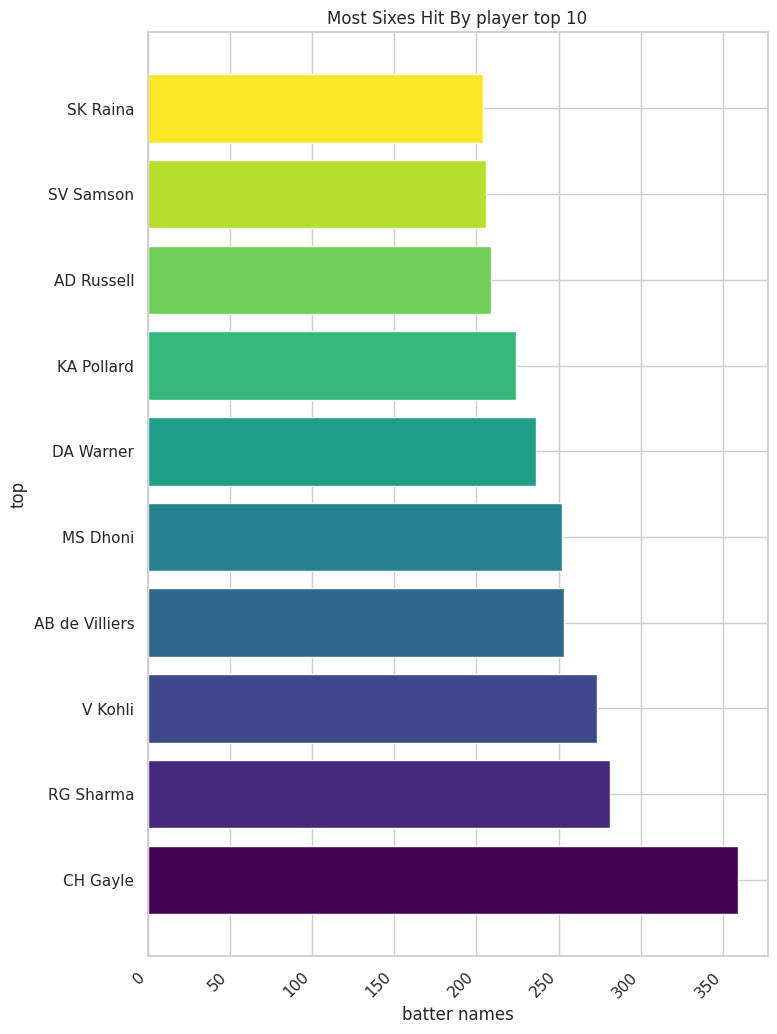

In [ ]:
plt.figure(figsize=(8,12))
six=deliveries[deliveries["batsman_runs"]==6]
six_count=six["batsman_runs"].count()
# Change 'batsman' to the correct column name if it's different, like 'batter'
top=six["batter"].value_counts().head(10)
colors=cm.get_cmap('viridis',10)
plt.barh(top.index,top.values,color=colors(np.arange(10)))
plt.title("Most Sixes Hit By player top 10")
plt.xlabel("batter names")
plt.ylabel("top")
plt.xticks(rotation=45,ha='right')
plt.show()


##8.Dot Ball Percentage by Bowler

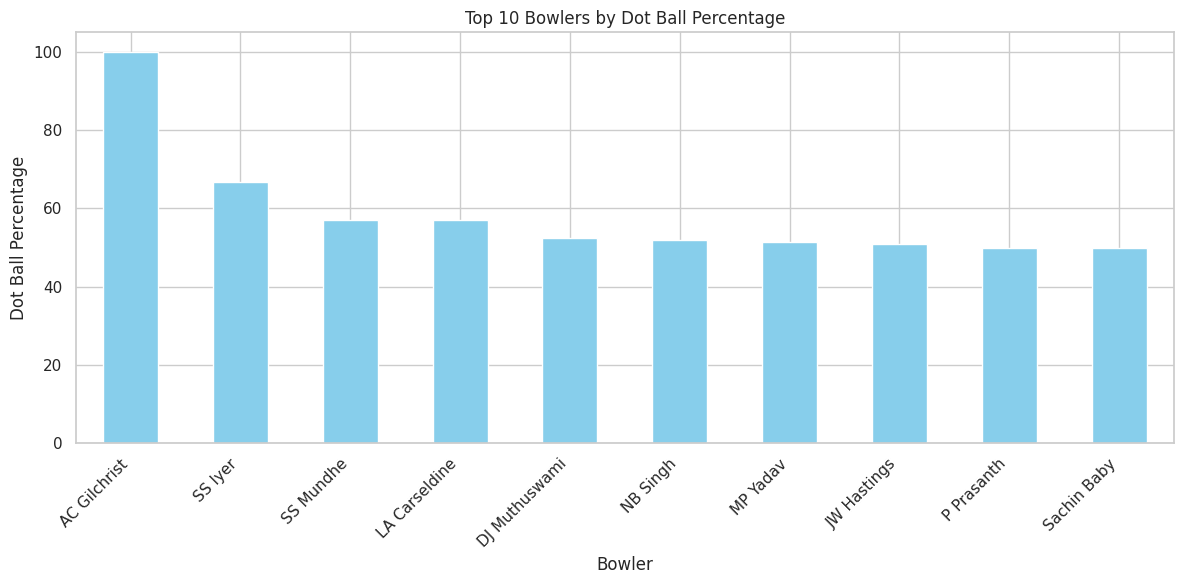

In [ ]:

dot_balls = deliveries[deliveries['total_runs'] == 0].groupby('bowler')['total_runs'].count()
total_balls_bowled = deliveries.groupby('bowler')['ball'].count()
dot_ball_percentage = (dot_balls / total_balls_bowled) * 100
plt.figure(figsize=(12, 6))
dot_ball_percentage.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Bowler')
plt.ylabel('Dot Ball Percentage')
plt.title('Top 10 Bowlers by Dot Ball Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##9.Top 10 Bowlers conceding Most Boundaries

<ipython-input-23-d3f3742229cc>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis', 10)


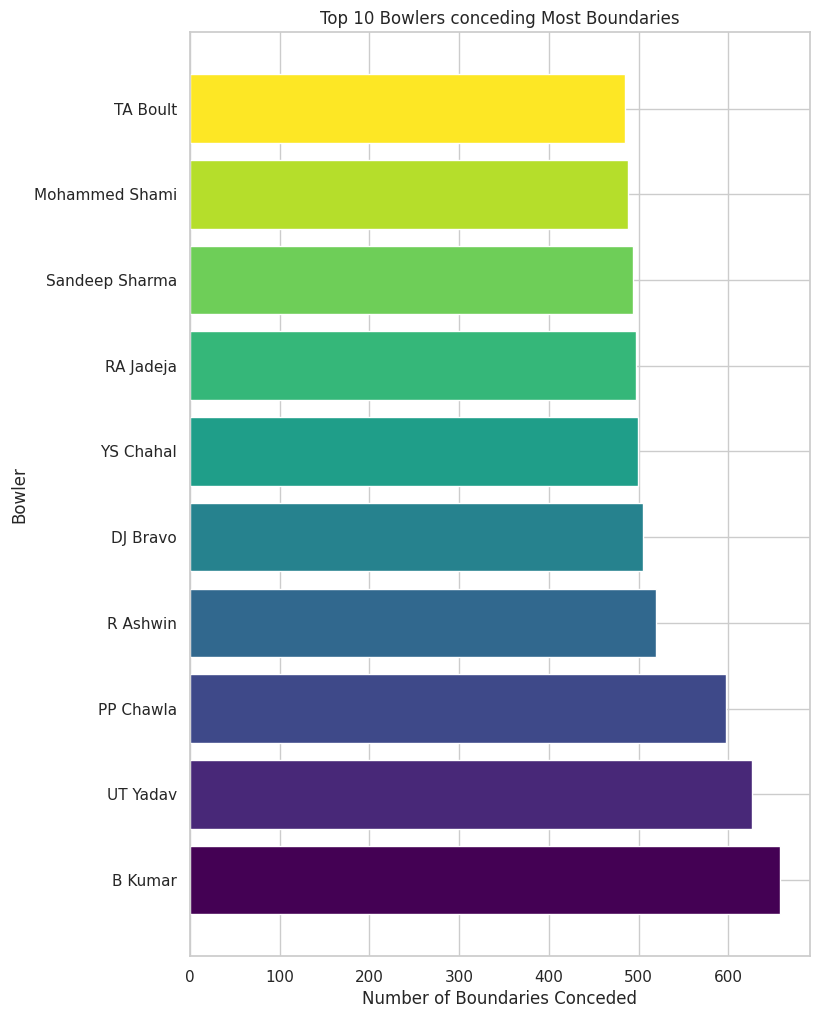

In [ ]:

plt.figure(figsize=(8, 12))
boundaries = deliveries[deliveries['batsman_runs'] >= 4]
boundaries_count = boundaries.groupby('bowler')['batsman_runs'].count().nlargest(10)
colors = cm.get_cmap('viridis', 10)
plt.barh(boundaries_count.index, boundaries_count.values, color=colors(np.arange(10)))
plt.title('Top 10 Bowlers conceding Most Boundaries')
plt.xlabel('Number of Boundaries Conceded')
plt.ylabel('Bowler')
plt.show()


##10.Wicket Distribution Across Over

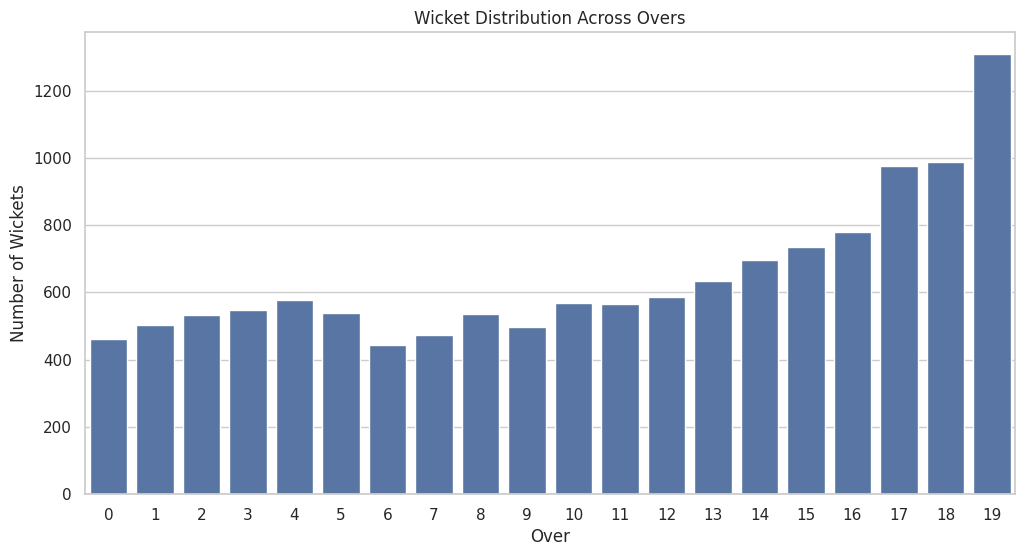

In [ ]:
plt.figure(figsize=(12, 6))
wickets_per_over = deliveries[deliveries['player_dismissed'].notna()].groupby('over')['player_dismissed'].count()
sns.countplot(x=deliveries[deliveries['player_dismissed'].notna()]['over'])
plt.xlabel('Over')
plt.ylabel('Number of Wickets')
plt.title('Wicket Distribution Across Overs')
plt.show()


##11.Total Runs Scored in Powerplay(1-6)

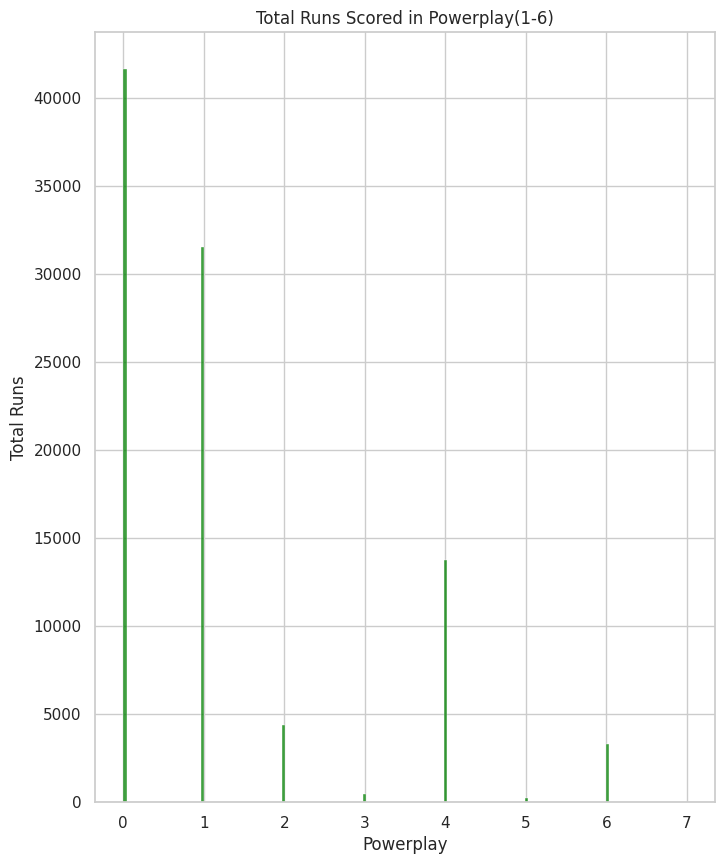

In [ ]:
plt.figure(figsize=(8,10))
same=deliveries[deliveries["over"]<=6]
runs_per_over=same.groupby("over")["total_runs"].sum()
sns.histplot(data=same,x="total_runs",color="green")
plt.xlabel("Powerplay")
plt.ylabel("Total Runs")
plt.title("Total Runs Scored in Powerplay(1-6)")
plt.show()

##12.Total Runs Scored in Death Overs(16-20)

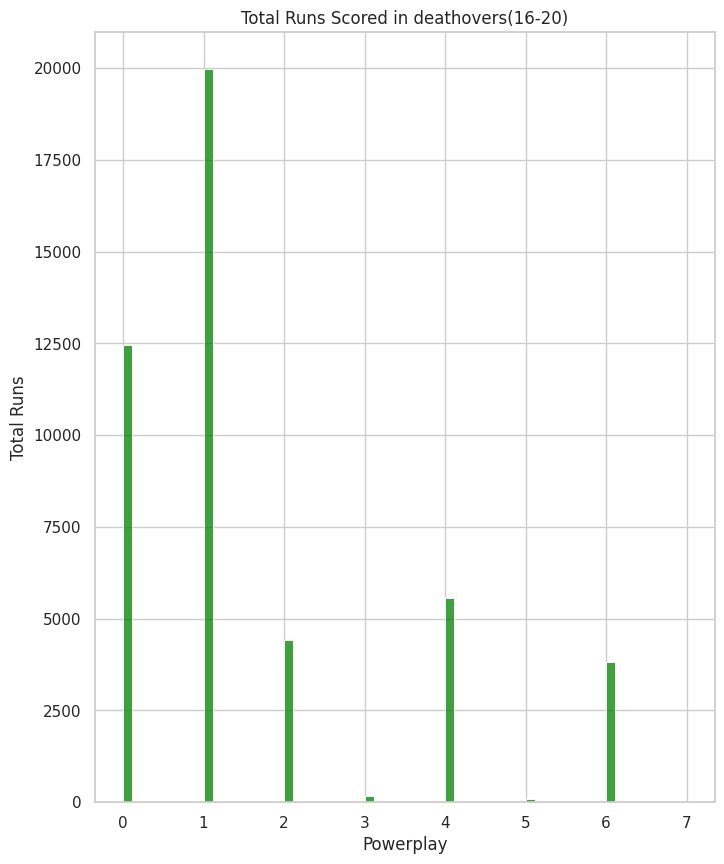

In [ ]:
plt.figure(figsize=(8,10))
same=deliveries[deliveries["over"]>=16]
runs_per_over=same.groupby("over")["total_runs"].sum
sns.histplot(data=same,x="total_runs",color="green")
plt.xlabel("Powerplay")
plt.ylabel("Total Runs")
plt.title("Total Runs Scored in deathovers(16-20)")
plt.show()

##13.Top 10 Most Economical Bowlers

<ipython-input-27-08ff1a9fa3bb>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors=cm.get_cmap('viridis',10)


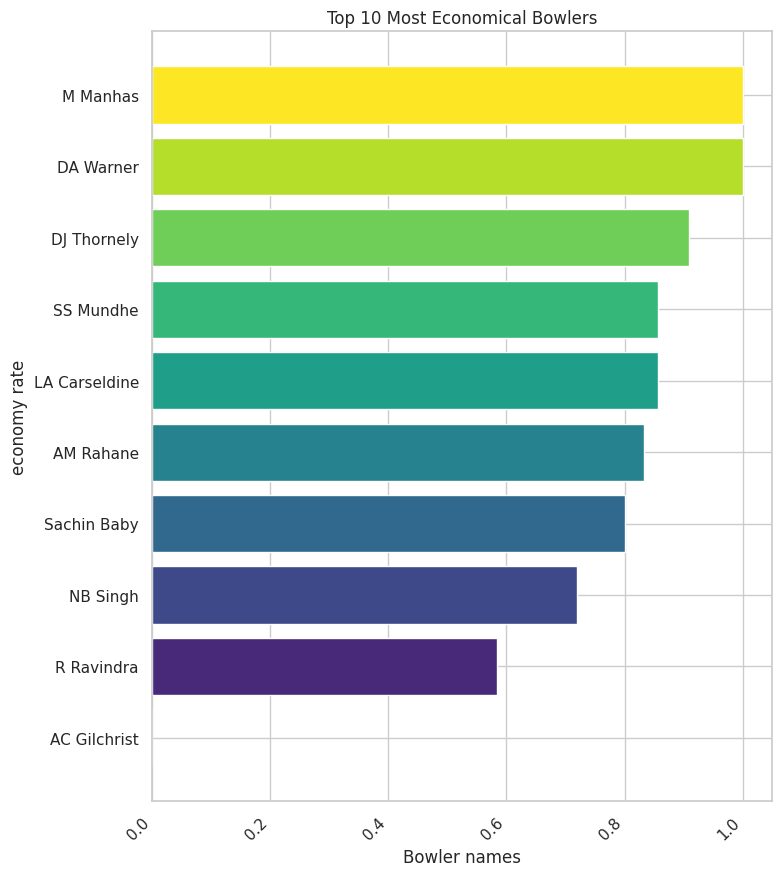

In [ ]:
plt.figure(figsize=(8,10))
bowler_runs=deliveries.groupby("bowler")["total_runs"].sum()
ball=deliveries.groupby("bowler")["ball"].count()
economy=bowler_runs/ball
top_10=economy.nsmallest(10)
colors=cm.get_cmap('viridis',10)
plt.barh(top_10.index,top_10.values,color=colors(np.arange(10)))
plt.title("Top 10 Most Economical Bowlers")
plt.xlabel("Bowler names")
plt.ylabel("economy rate")
plt.xticks(rotation=45,ha='right')
plt.show()
